In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/sovandas4/Indian-Startup-Analysis/main/startup_funding.txt?token=GHSAT0AAAAAACBN337WNTB4RQP2NIAYR4YCZB2WHGQ')

In [3]:
df.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN


In [4]:
print("Indian Startup funding data contain")
print('Nos. of Rows:', df.shape[0])
print('Nos. of columns:', df.shape[1])

Indian Startup funding data contain
Nos. of Rows: 2372
Nos. of columns: 10


## Features Descriptions


Sno: Serial number

Date: Date of funding

StartupName: Name of the startup

IndustryVertical: Industry to which the startup belongs.

SubVertical: Sub-category of the industry type.

CityLocation: City which the startup is based out of.

InvestorsName: Name of the investors involved in the funding round.

InvestmentType: Either Private Equity or Seed Funding.

AmountInUSD: Funding Amount in USD.

Remarks: Other information, if any.




### Columns with missing values, So we need to cleanup using different method or we can ignore them


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2372 entries, 0 to 2371
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   SNo               2372 non-null   int64 
 1   Date              2372 non-null   object
 2   StartupName       2372 non-null   object
 3   IndustryVertical  2201 non-null   object
 4   SubVertical       1436 non-null   object
 5   CityLocation      2193 non-null   object
 6   InvestorsName     2364 non-null   object
 7   InvestmentType    2371 non-null   object
 8   AmountInUSD       1525 non-null   object
 9   Remarks           419 non-null    object
dtypes: int64(1), object(9)
memory usage: 185.4+ KB
None


## Data Cleaning

#### Find out the frequency of missing data in each column along with its percentage.

In [6]:
null = pd.isnull(df).sum()
cols = null.index
frequency = null.values
percentage = ((frequency/df.shape[0])*100)
data_f= {'Columns':cols,'Nos of Missing values':frequency,'Percentage':percentage}
missing_val = pd.DataFrame(data=data_f).sort_values('Percentage',ascending=False).set_index('Columns')

missing_val

,Nos of Missing values,Percentage
Columns,,
Remarks,1953,82.335582
SubVertical,936,39.460371
AmountInUSD,847,35.708263
CityLocation,179,7.546374
IndustryVertical,171,7.209106
InvestorsName,8,0.337268
InvestmentType,1,0.042159
SNo,0,0.000000
Date,0,0.000000


From the above output, we can see that Remarks column has 1953 rows of missing values. Since there is no way to fill in this column neither it looks important for analysis, we will remove it from our dataset and try to work on the remaining column's missing values.
Also removing SNo, since it doesn't contribute to our analysis

#### Droping not required variable from our dataset

In [7]:
df.drop(columns=['Remarks'], inplace=True)
df.drop(columns=['SNo'], inplace=True)

#### Check again weather the changes done or not

In [8]:
null = pd.isnull(df).sum()
cols = null.index
frequency = null.values
percentage = ((frequency/df.shape[0])*100)
data_f= {'Columns':cols,'Nos of Missing values':frequency,'Percentage':percentage}
missing_val = pd.DataFrame(data=data_f).sort_values('Percentage',ascending=False).set_index('Columns')

missing_val

,Nos of Missing values,Percentage
Columns,,
SubVertical,936,39.460371
AmountInUSD,847,35.708263
CityLocation,179,7.546374
IndustryVertical,171,7.209106
InvestorsName,8,0.337268
InvestmentType,1,0.042159
Date,0,0.000000
StartupName,0,0.000000


## One by One deal with missing values in each column

## SubVertical

In [9]:
df['SubVertical'].describe()

count                1436
unique               1364
top       Online Pharmacy
freq                    9
Name: SubVertical, dtype: object

In [10]:
len(df['SubVertical'].unique())

1365

There are 1365 unique sub-vertical and 936 unknown sub-vertical

There are two option to deal with this variable

1. Replace the missing values as 'Not Specified' string

2. Or Ignore the missing values

In [11]:
df['SubVertical'].fillna(value='Not Specified',inplace=True)

#### Check SubVertical's nos. of missing values 

In [12]:

null = pd.isnull(df).sum()
cols = null.index
frequency = null.values
percentage = ((frequency/df.shape[0])*100)
data_f= {'Columns':cols,'Nos of Missing values':frequency,'Percentage':percentage}
missing_val = pd.DataFrame(data=data_f).sort_values('Percentage',ascending=False).set_index('Columns')

missing_val

,Nos of Missing values,Percentage
Columns,,
AmountInUSD,847,35.708263
CityLocation,179,7.546374
IndustryVertical,171,7.209106
InvestorsName,8,0.337268
InvestmentType,1,0.042159
Date,0,0.000000
StartupName,0,0.000000
SubVertical,0,0.000000


## AmountInUSD 

In [13]:
df['AmountInUSD'].describe()

count          1525
unique          329
top       1,000,000
freq            130
Name: AmountInUSD, dtype: object

#### AmountInUSD is not in numeric format, so convert into numeric format

In [14]:
df['AmountInUSD']=df['AmountInUSD'].apply(lambda x: float(str(x).replace(',','')))
df['AmountInUSD'].head()

0    1300000.0
1          NaN
2          NaN
3     500000.0
4     850000.0
Name: AmountInUSD, dtype: float64

In [15]:
len(df['AmountInUSD'].unique())

329

In [16]:
import math
df['AmountInUSD'].describe().apply(lambda x: math.ceil(x))
# applied math.ceil() to express the numbers in normal format instead of exponential

count          1525
mean       12031074
std        64031176
min           16000
25%          370000
50%         1070000
75%         6000000
max      1400000000
Name: AmountInUSD, dtype: int64

In [17]:
df[df['AmountInUSD'].isnull()].shape

(847, 8)

There are 847 rows with missing values in 'AmountInUSD' column

median_amount_of_industries = data.groupby('IndustryVertical')['AmountInUSD'].median().sort_values(ascending=False).apply(lambda x:format(x,'f'))

d=dict(zip(median_amount_of_industries.index,median_amount_of_industries.values)) for i,v in d.items(): if v==np.nan or v is none: v=None d[i]=round(float(v),1)

As the funding provided to startups vary due to factors such as business models, requirement of funds, target industry, and so on. Thus, the missing values of funding should not be filling by measures of central tendency        


null = pd.isnull(df).sum()
cols = null.index
frequency = null.values
percentage = ((frequency/df.shape[0])*100)
data_f= {'Columns':cols,'Nos of Missing values':frequency,'Percentage':percentage}
missing_val = pd.DataFrame(data=data_f).sort_values('Percentage',ascending=False).set_index('Columns')

missing_val

## CityLocation

In [18]:
df['CityLocation'].head(10)

0    Bangalore
1       Mumbai
2    New Delhi
3       Mumbai
4    Hyderabad
5    Bangalore
6    Ahmedabad
7      Gurgaon
8    Bangalore
9        Noida
Name: CityLocation, dtype: object

In [19]:
df['CityLocation'].describe()

count          2193
unique           71
top       Bangalore
freq            627
Name: CityLocation, dtype: object

In [20]:
df[df['CityLocation'].isnull()].shape

(179, 8)

There are 179 null values in CityLocation, that is 7% of the entire dataset.

Lets replace with "Not Specific".

Also, some rows have multiple cities, so lets clean them up and just use one city name

In [21]:
df['CityLocation'].fillna(value='Not Specified', inplace=True)

Making function to check if multiple cities are mentioned separated by '/', if yes, the replace it with the first name

In [22]:
def single_city(x):
    return x.split('/')[0].strip()

In [23]:
df['CityLocation']=df['CityLocation'].apply(single_city)

In [24]:
df['CityLocation'].value_counts().head(15)

Bangalore        634
Mumbai           449
New Delhi        385
Gurgaon          241
Not Specified    179
Pune              91
Noida             79
Hyderabad         77
Chennai           67
Ahmedabad         35
Jaipur            25
Kolkata           19
Chandigarh        10
Vadodara           9
Indore             9
Name: CityLocation, dtype: int64

#### Check CityLocation's nos. of missing values 

In [25]:
null = pd.isnull(df).sum()
cols = null.index
frequency = null.values
percentage = ((frequency/df.shape[0])*100)
data_f= {'Columns':cols,'Nos of Missing values':frequency,'Percentage':percentage}
missing_val = pd.DataFrame(data=data_f).sort_values('Percentage',ascending=False).set_index('Columns')

missing_val

,Nos of Missing values,Percentage
Columns,,
AmountInUSD,847,35.708263
IndustryVertical,171,7.209106
InvestorsName,8,0.337268
InvestmentType,1,0.042159
Date,0,0.000000
StartupName,0,0.000000
SubVertical,0,0.000000
CityLocation,0,0.000000


## IndustryVertical

IndustryVertical has 171 null values, filling those rows with value 'Other'.

Also, there are some duplicate values with different Caps. To sort this, lets convert all to lowercase so that all have same caps.

In [26]:
df['IndustryVertical'].value_counts().head(15)

Consumer Internet            772
Technology                   313
eCommerce                    171
ECommerce                     53
Healthcare                    30
Logistics                     24
Education                     20
Food & Beverage               19
Finance                        9
Others                         6
Online Food Delivery           5
Online Education Platform      5
Real Estate                    4
Ecommerce                      3
Logistics Tech                 3
Name: IndustryVertical, dtype: int64

In [27]:
df['IndustryVertical'].fillna('Others', inplace=True)

In [28]:
df['IndustryVertical']=df['IndustryVertical'].apply(lambda x: x.lower())

Cheak the duplicates are Changed or not 

In [29]:
df['IndustryVertical'].value_counts().head(15)

consumer internet               772
technology                      313
ecommerce                       230
others                          177
healthcare                       31
logistics                        24
education                        20
food & beverage                  19
finance                           9
online education platform         5
online food delivery              5
real estate                       4
food delivery platform            4
hyperlocal handyman services      4
fmcg                              3
Name: IndustryVertical, dtype: int64

#### Check IndustryVertical's nos. of missing values 

In [30]:
null = pd.isnull(df).sum()
cols = null.index
frequency = null.values
percentage = ((frequency/df.shape[0])*100)
data_f= {'Columns':cols,'Nos of Missing values':frequency,'Percentage':percentage}
missing_val = pd.DataFrame(data=data_f).sort_values('Percentage',ascending=False).set_index('Columns')

missing_val

,Nos of Missing values,Percentage
Columns,,
AmountInUSD,847,35.708263
InvestorsName,8,0.337268
InvestmentType,1,0.042159
Date,0,0.000000
StartupName,0,0.000000
IndustryVertical,0,0.000000
SubVertical,0,0.000000
CityLocation,0,0.000000


## InvestorsName

In [31]:
df['InvestorsName'].value_counts().head()

Undisclosed Investors    33
Undisclosed investors    27
Ratan Tata               24
Indian Angel Network     24
Kalaari Capital          16
Name: InvestorsName, dtype: int64

InvestorsName has 8 null values, filling those rows with value 'Undisclosed Investors'.

Also, Need to Change 'Undisclosed investors' to 'Undisclosed Investors'

In [32]:
df['InvestorsName'].fillna(value='Undisclosed Investors', inplace =True)

In [33]:
df['InvestorsName']=df['InvestorsName'].replace('Undisclosed investors','Undisclosed Investors')

In [34]:
df['InvestorsName'].value_counts().head()

Undisclosed Investors       68
Indian Angel Network        24
Ratan Tata                  24
Kalaari Capital             16
Group of Angel Investors    15
Name: InvestorsName, dtype: int64

#### Check IndustryName's nos. of missing values 


In [35]:
null = pd.isnull(df).sum()
cols = null.index
frequency = null.values
percentage = ((frequency/df.shape[0])*100)
data_f= {'Columns':cols,'Nos of Missing values':frequency,'Percentage':percentage}
missing_val = pd.DataFrame(data=data_f).sort_values('Percentage',ascending=False).set_index('Columns')

missing_val

,Nos of Missing values,Percentage
Columns,,
AmountInUSD,847,35.708263
InvestmentType,1,0.042159
Date,0,0.000000
StartupName,0,0.000000
IndustryVertical,0,0.000000
SubVertical,0,0.000000
CityLocation,0,0.000000
InvestorsName,0,0.000000


## InvestmentType

In [36]:
df['InvestmentType'].describe()

count             2371
unique               7
top       Seed Funding
freq              1271
Name: InvestmentType, dtype: object

InvestmentType has 1 null values, filling those rows with most common value, i.e. Seed Funding

Also, Need to Change 'SeedFunding' to 'Seed Funding'

In [37]:
df['InvestmentType'].fillna('Seed Funding', inplace=True)

In [38]:
df['InvestmentType'].value_counts().head()

Seed Funding      1272
Private Equity    1066
SeedFunding         30
Debt Funding         1
PrivateEquity        1
Name: InvestmentType, dtype: int64

In [39]:
df['InvestmentType']=df['InvestmentType'].replace('SeedFunding','Seed Funding')

In [40]:
df['InvestmentType'].value_counts().head()

Seed Funding      1302
Private Equity    1066
Debt Funding         1
PrivateEquity        1
Crowd funding        1
Name: InvestmentType, dtype: int64

## Date

In [41]:
df['Date'].describe()

count           2372
unique           701
top       02/02/2015
freq              11
Name: Date, dtype: object

When i intially tried to convert Date column to date time, several errors popped up due to bad format ('.' instead of '/' and so on. so cleaned the strings, then convert to datetime.

In [42]:
df['Date']=df['Date'].apply(lambda x: str(x).replace('.','/'))
df['Date']=df['Date'].apply(lambda x: str(x).replace('//','/'))


In [43]:
df['Date']=pd.to_datetime(df['Date'])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '14/07/2017' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '17/07/2017' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '18/07/2017' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '19/07/2017' in DD/MM/YYYY format. Provide format or specif

In [44]:
df.head()

,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD
0,2017-01-08,TouchKin,technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,1300000.0
1,2017-02-08,Ethinos,technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN
2,2017-02-08,Leverage Edu,consumer internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN
3,2017-02-08,Zepo,consumer internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,500000.0
4,2017-02-08,Click2Clinic,consumer internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,850000.0


In [45]:
df=df.sort_values('Date',ascending = False).reset_index()

In [46]:
df.head()

,index,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD
0,19,2017-12-07,Innoviti,technology,Digital payments solutions,Bangalore,"SBI-FMO Fund, Bessemer Venture Partners, Catam...",Private Equity,18500000.0
1,22,2017-12-07,Arcatron,technology,Next Gen Mobility device manufacturer,Pune,Indian Angel Network,Seed Funding,NaN
2,21,2017-12-07,Bottr.me,technology,Chatbot creation tool,Bangalore,"500 Startups, Purvi Capital, Rajan Anandan, Ab...",Seed Funding,NaN
3,20,2017-12-07,VDeliver,logistics,Door Step Delivery platform,Hyderabad,"Corvus Ventures, MAPE Advisory Group",Private Equity,NaN
4,72,2017-12-06,CoverFox,consumer internet,Online insurance brokerage platform,Mumbai,Transamerica,Private Equity,15000000.0


## StartupName

In [47]:
df['StartupName'].value_counts().head(100)

Swiggy        7
UrbanClap     6
NoBroker      5
Paytm         5
Medinfi       5
             ..
Flytxt        2
Fitternity    2
TinyOwl       2
Oyo Rooms     2
Villgro       2
Name: StartupName, Length: 100, dtype: int64

In [48]:
df['StartupName']=df['StartupName'].apply(lambda x: x.lower())

It was found that there have been separate names for same startups due to differents spellings. so remove all ambiguous names and replace with same name.

In [49]:
df['StartupName']=df['StartupName'].apply(lambda x: str(x).replace('ola cabs','ola'))
df['StartupName']=df['StartupName'].apply(lambda x: str(x).replace('olacabs','ola'))
df['StartupName']=df['StartupName'].apply(lambda x: str(x).replace('flipkart.com','flipkart'))
df['StartupName']=df['StartupName'].apply(lambda x: str(x).replace('paytm marketplace','paytm'))

In [50]:
print('unique startups founded:', df['StartupName'].unique())

unique startups founded: ['innoviti' 'arcatron' 'bottr.me' ... 'glamrs' 'proviera' 'termsheet']


In [51]:
print('Nos. of unique startups founded:', df['StartupName'].nunique())

Nos. of unique startups founded: 1917


# Exploring the Dataset

In [52]:
# This method allows us to make the ticks showed in x-axis more readable by inserting newlines, We can pass in
# a series and it returns a formatted index series
def ticks_display_cleaner(series):
    putSpace=True
    index=list(series.index)
    values=list(series.values)
    for i in range(len(index)):
        c=index[i].strip().split(' ')
        if len(c)>2:
            c.insert(2,'\n')
        if len(c)>5:
            c.insert(5,'\n')
        for j in range(len(c)):
            if c[j]!='\n':
                c[j]=c[j]+' '
        index[i]=''.join(c)
    return pd.Series(values,index=index)

# Q1. Top 20 Startups on the basic of funds acquired

In [53]:
tp_20 = pd.DataFrame(df.groupby('StartupName')['AmountInUSD'].sum().sort_values(ascending=False).reset_index().head(20))
tp_20['AmountInUSD']=tp_20['AmountInUSD'].apply(lambda x: math.ceil(x))
tp_20

,StartupName,AmountInUSD
0,paytm,2340000000
1,flipkart,2259700000
2,ola,1899500000
3,snapdeal,700000000
4,oyo rooms,375000000
5,quikr,230000000
6,delhivery,215000000
7,foodpanda,210000000
8,shopclues,207700000
9,bigbasket,207000000


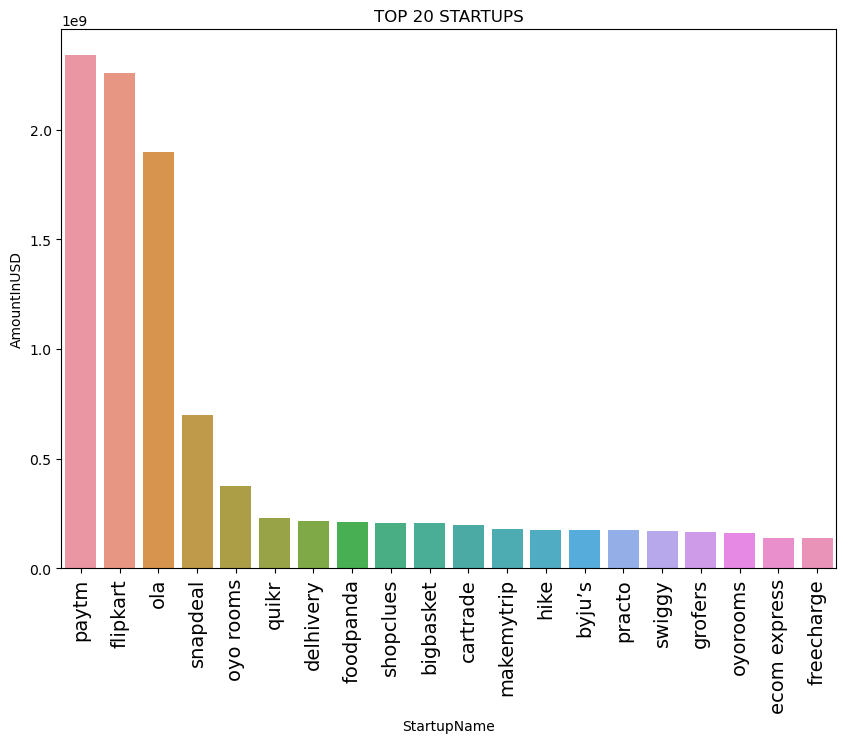

In [54]:
plt.figure(figsize=(10,7))
plt.title('TOP 20 STARTUPS')
plt.xticks(fontsize = 14,rotation='vertical')
sns.barplot(x='StartupName', y='AmountInUSD',data=tp_20)
plt.savefig('top20startups.png')

# Q2. Startups Which acquired the minimum amount of funds

In [55]:
print('Minimum Funds acquired by a startup:', df['AmountInUSD'].describe()['min'])

Minimum Funds acquired by a startup: 16000.0


In [56]:
df[df['AmountInUSD']==16000]

,index,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD
2322,2347,2015-01-19,yo grad,others,Not Specified,Not Specified,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000.0
2325,2345,2015-01-19,hostel dunia,others,Not Specified,Not Specified,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000.0
2326,2346,2015-01-19,play your sport,others,Not Specified,Not Specified,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000.0
2328,2348,2015-01-19,enabli,others,Not Specified,Not Specified,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000.0
2329,2349,2015-01-19,cbs,others,Not Specified,Not Specified,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000.0


# Q3. Which Industry has Maximum number of startups?

In [57]:
df1=df[df['IndustryVertical']!='others']
tp_10_ind = df1['IndustryVertical'].value_counts().sort_values(ascending=False).head(10)
print(tp_10_ind)
tp_10_ind=ticks_display_cleaner(tp_10_ind)
#tp_10_ind2=pd.DataFrame(tp_10_ind, columns = ["Industry Vertical"])#, "Count of Startup Industries"])
#tp_10_ind2

consumer internet            772
technology                   313
ecommerce                    230
healthcare                    31
logistics                     24
education                     20
food & beverage               19
finance                        9
online education platform      5
online food delivery           5
Name: IndustryVertical, dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


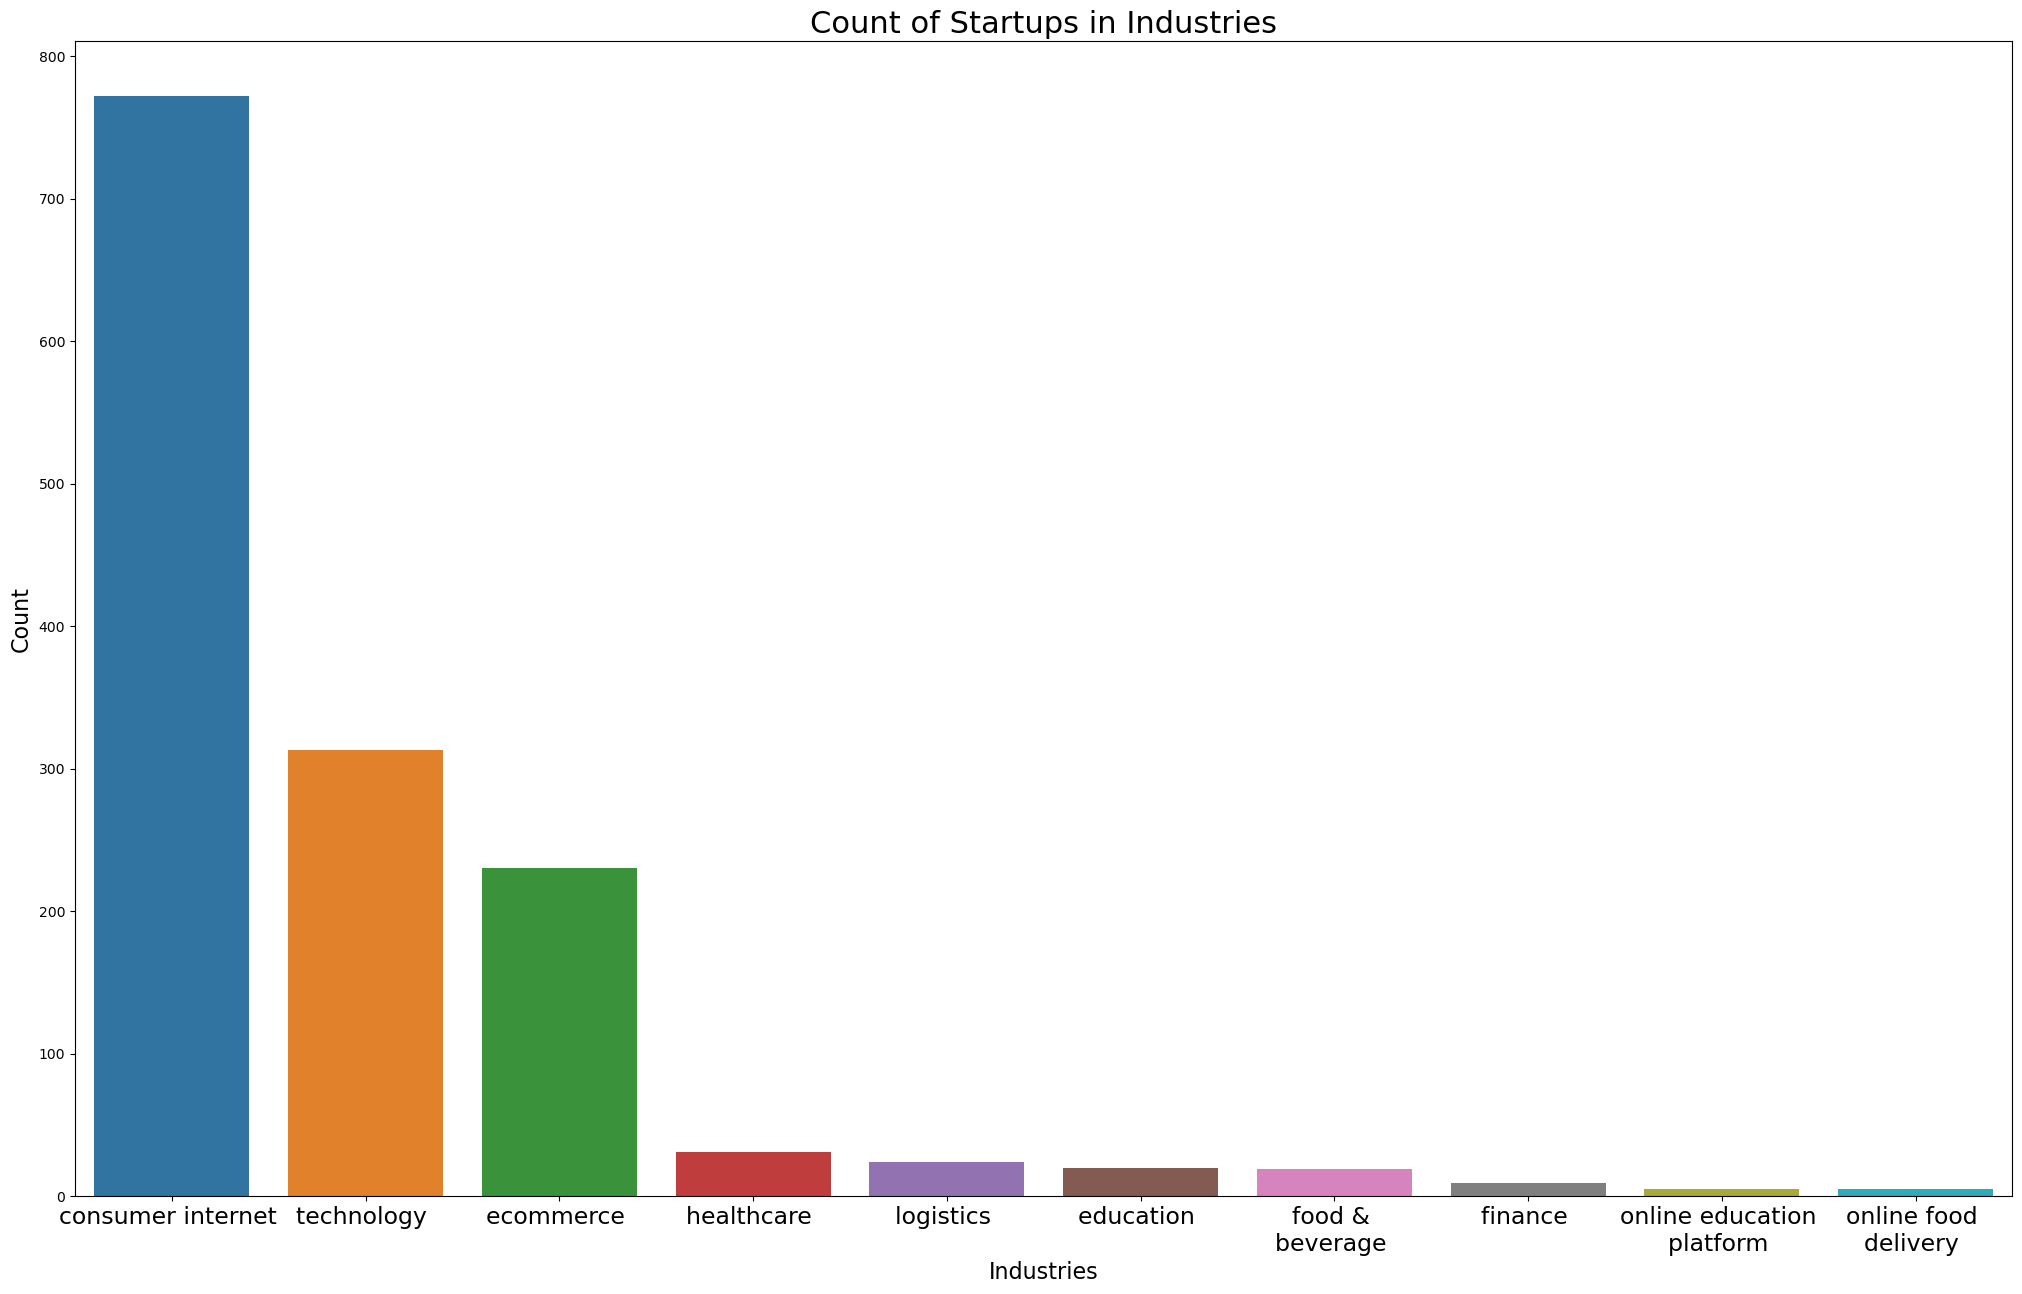

In [58]:
plt.figure(figsize=(25,15))
plt.xlabel('Industries',fontsize=16)
plt.ylabel('Count',fontsize = 16)
plt.title('Count of Startups in Industries',fontsize=22)
plt.xticks(fontsize=17)
sns.barplot(tp_10_ind.index,tp_10_ind.values)
plt.savefig('Industries.png',dpi=300)


The top 3 industries having max number of startups are:
    
    Consumer Internet
    
    Technology
    
    E Commerce

In [59]:
data=df[df['SubVertical']!='Not Specified']
data['SubVertical'].value_counts(ascending=False).head(10)

Online Pharmacy                   9
Food Delivery Platform            8
Online lending platform           5
Online Learning Platform          4
Online Payment Gateway            3
Data Analytics platform           3
Fitness Mobile App                3
ECommerce Marketplace             3
Online ticket booking platform    2
Online Food Delivery Platform     2
Name: SubVertical, dtype: int64

### Lets have look at each Industry from Closer point of view

## 1. Consumer Internet

Checking out top 10 sub-categories of industry having highest number of startups

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Consumer Internet Sub-Category'}, xlabel='Sub-Categories', ylabel='Count'>

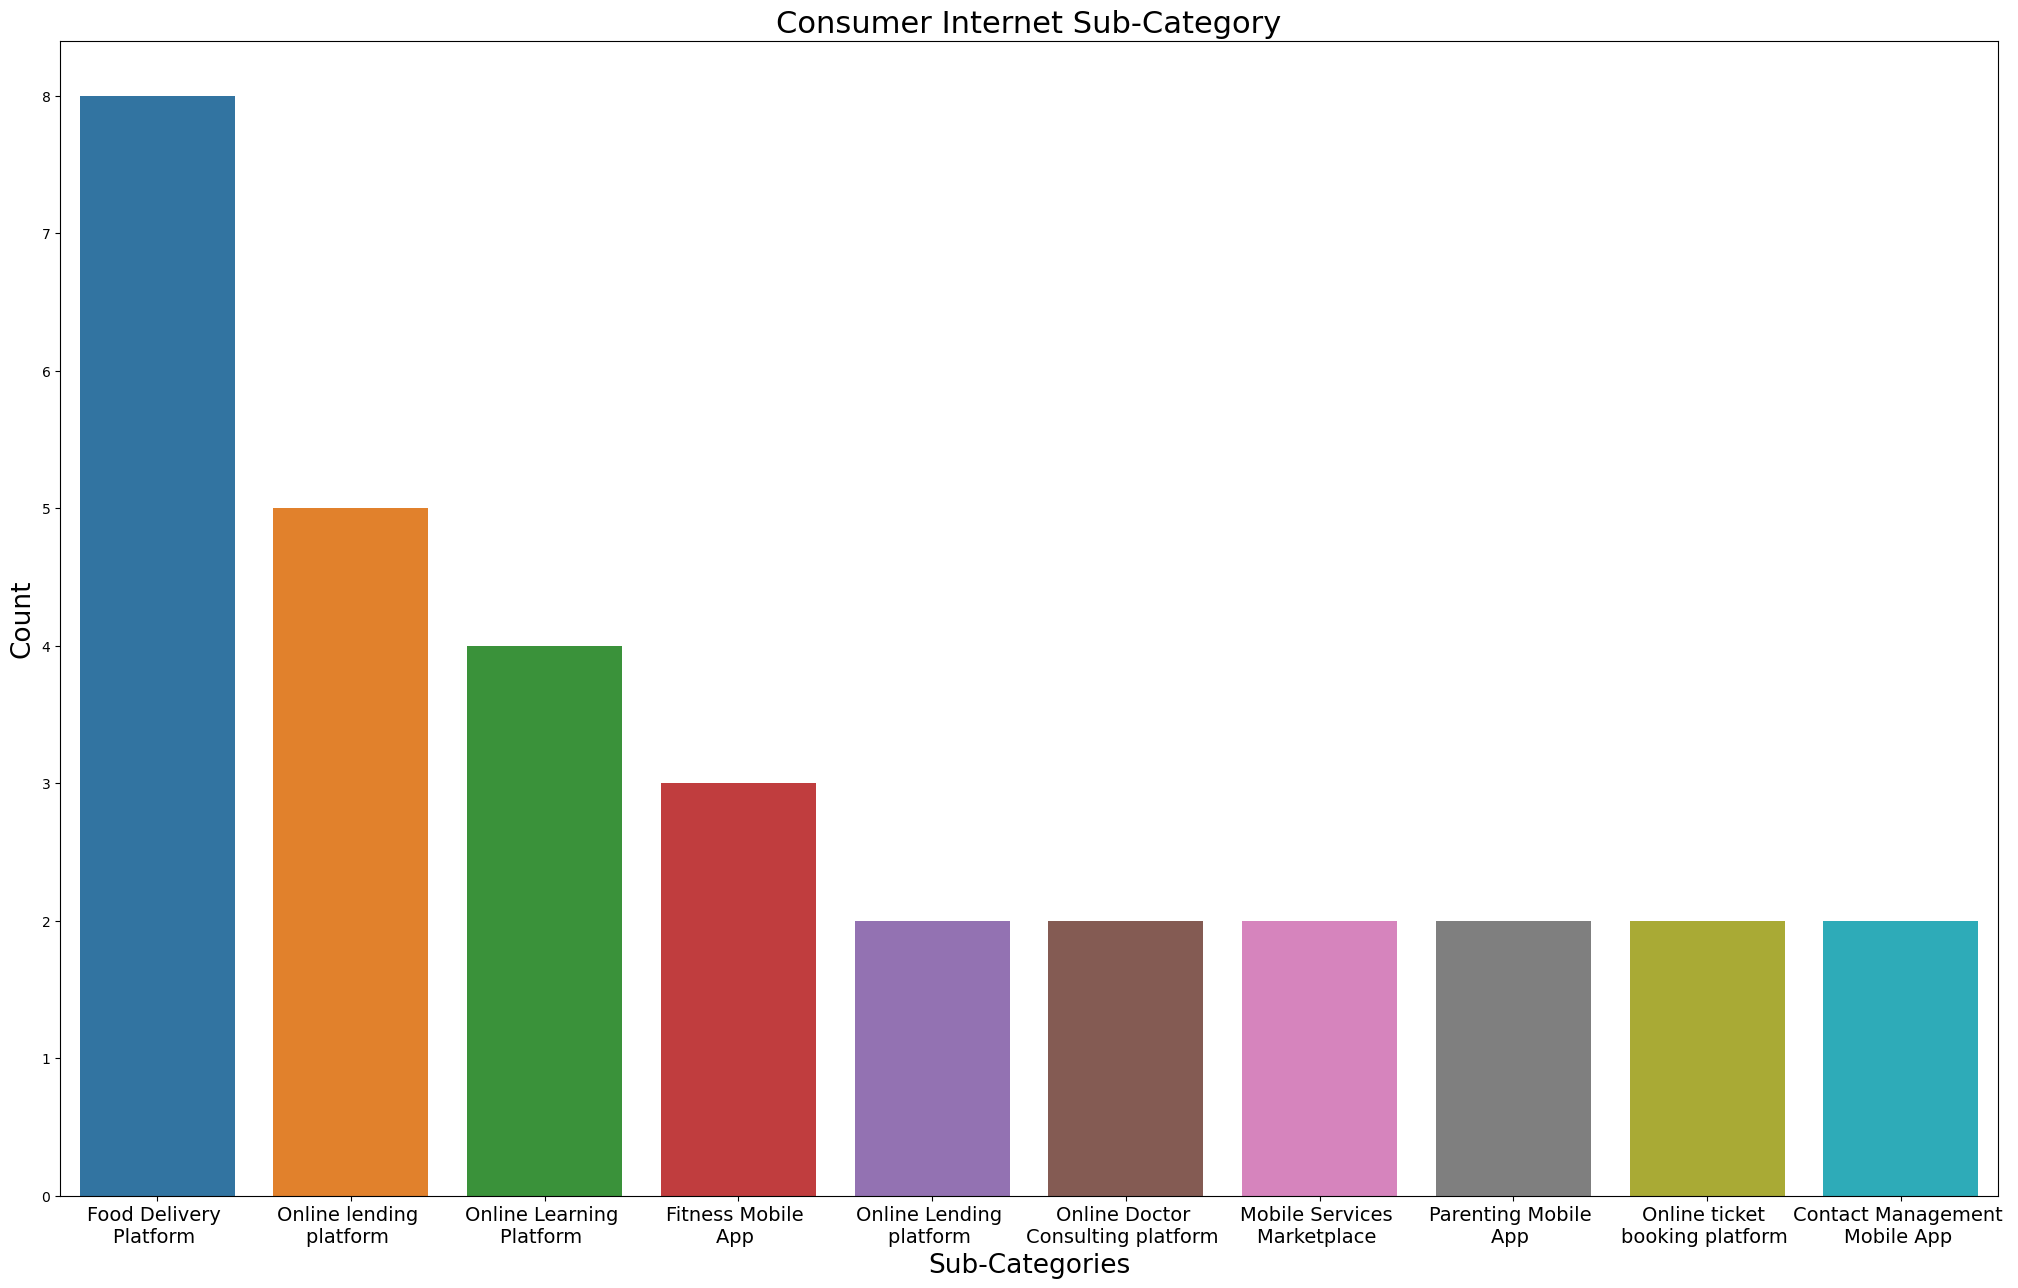

In [61]:
ci=df[df['IndustryVertical']=='consumer internet']
top_10_ci_sub=ci['SubVertical'].value_counts().sort_values(ascending=False).head(10)
top_10_ci_sub=ticks_display_cleaner(top_10_ci_sub)
plt.figure(figsize=(25,15))
plt.xticks(fontsize=14)
plt.title('Consumer Internet Sub-Category',fontsize=22)
plt.xlabel('Sub-Categories',fontsize=19)
plt.ylabel('Count',fontsize=19)
sns.barplot(top_10_ci_sub.index,top_10_ci_sub.values)


Food Delivery Platform has 8 startups, followed by Online Lending Platform,

Online Learning Platform, and Fitness Mobile App having5,4, and 3 startups listed respectively

### Top Consumer Internet Startups

In [62]:
ci.groupby('StartupName')['AmountInUSD'].sum().sort_values(ascending=False).astype(int).head(10).reset_index()


,StartupName,AmountInUSD
0,ola,744500000
1,oyo rooms,250000000
2,cartrade,200000000
3,makemytrip,180000000
4,hike,175000000
5,swiggy,137000000
6,byju’s,125000000
7,oyo,100000000
8,mobikwik,90000000
9,bookmyshow,82000000


## 2. Technology

In [63]:
tech=df[df['IndustryVertical']=='technology']


### Top Technology based startups on the basis of funds acquired


In [64]:
tech.groupby('StartupName')['AmountInUSD'].sum().sort_values(ascending=False).astype(int).head(10).reset_index()


,StartupName,AmountInUSD
0,fractal analytics,100000000
1,delhivery,100000000
2,rivigo,75000000
3,markets and markets,56000000
4,druva,51000000
5,icertis,40000000
6,amagi media labs,35000000
7,eps,35000000
8,mswipe,31000000
9,qubole,30000000


Delhivery, Fractal Analytics, Rivigo are top Technology based startups



## 3. ECommerce


In [66]:
commerce=df[df['IndustryVertical']=='ecommerce']


### Top ECommerce based startups on the basis of funds acquired


In [67]:
commerce.groupby('StartupName')['AmountInUSD'].sum().sort_values(ascending=False).astype(int).head(10).reset_index()


,StartupName,AmountInUSD
0,paytm,1660000000
1,flipkart,1509700000
2,snapdeal,200000000
3,bigbasket,157000000
4,shopclues,107700000
5,lenskart,63500000
6,pepperfry,31300000
7,bluestone,30000000
8,1mg,30000000
9,voonik,29000000


 Paytm, Flipkart, SnapDeal are top ECommerce based startups with highest amount funded

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Top 10 Sub-Categories in ECommerce Industry'}, ylabel='Count'>

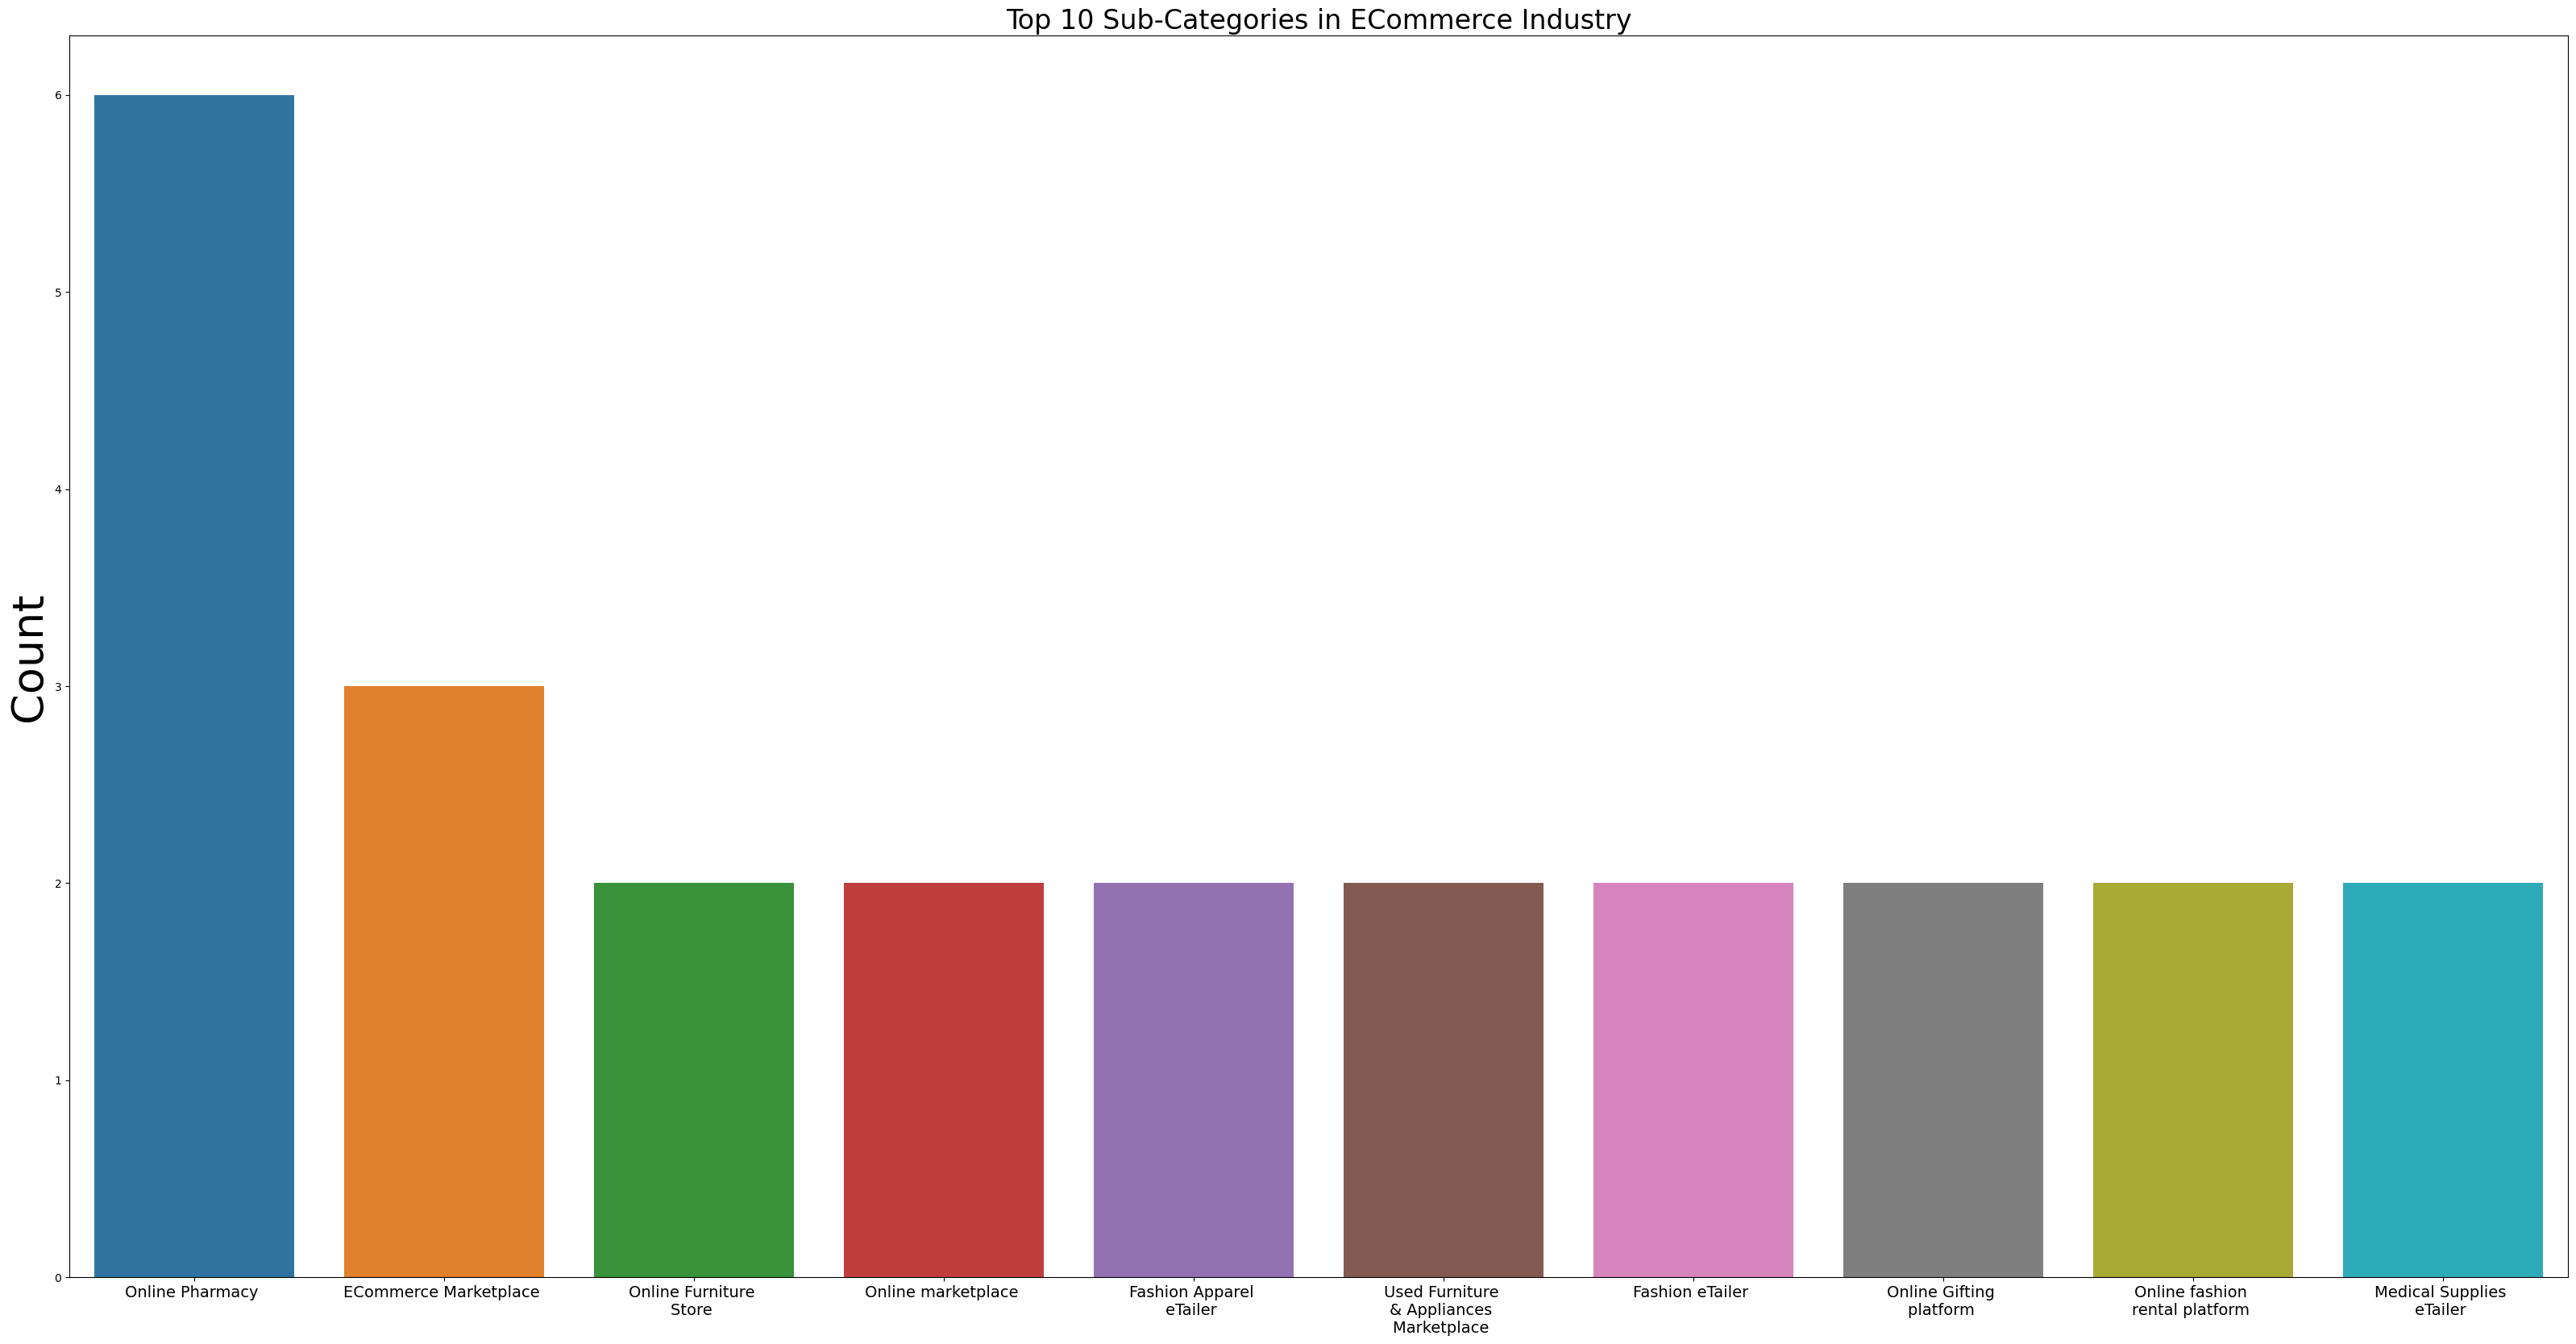

In [71]:
top_10_comm_sub=commerce['SubVertical'].value_counts().sort_values(ascending=False).head(10)
top_10_comm_sub=ticks_display_cleaner(top_10_comm_sub)
plt.figure(figsize=(40,20))
plt.ylabel('Count',fontsize=39)
plt.xticks(fontsize=14)
plt.title('Top 10 Sub-Categories in ECommerce Industry',fontsize=24)
sns.barplot(top_10_comm_sub.index,top_10_comm_sub.values)


There are 6 startups based on Online Pharmacy sub-category, followed by 3 startups in ECommerce Marketplace Sub-Category.

In [73]:
# Creating new columns, Month, Year, Quarter, QuarterYear
# QuarterYear is the concatenation of year+quarter to show the 4 quarters of each year which will be further used
# below in our analysis.
date_year=df['Date'].dt

df['Month']=date_year.month
df['Year']=date_year.year

df['Quarter']=''
df['Year']=df['Year'].astype('object')

df.loc[(df['Month']>=1) & (df['Month']<=3),'Quarter']=str(1)
df.loc[(df['Month']>=4) & (df['Month']<=6),'Quarter']=str(2)
df.loc[(df['Month']>=7) & (df['Month']<=9),'Quarter']=str(3)
df.loc[(df['Month']>=10) & (df['Month']<=12),'Quarter']=str(4)

df['QuarterYear']=df['Year'].astype(str)+"-Q"+df['Quarter'].astype(str)


In [75]:
df.groupby('QuarterYear')['StartupName'].count().sort_values(ascending=False)


QuarterYear
2015-Q3    275
2016-Q2    265
2016-Q1    251
2016-Q3    239
2016-Q4    238
2015-Q4    237
2015-Q2    215
2015-Q1    209
2017-Q1    166
2017-Q2    151
2017-Q3     74
2017-Q4     52
Name: StartupName, dtype: int64

<AxesSubplot:title={'center':'Quarterly Trend'}, xlabel='QuarterYear', ylabel='count'>

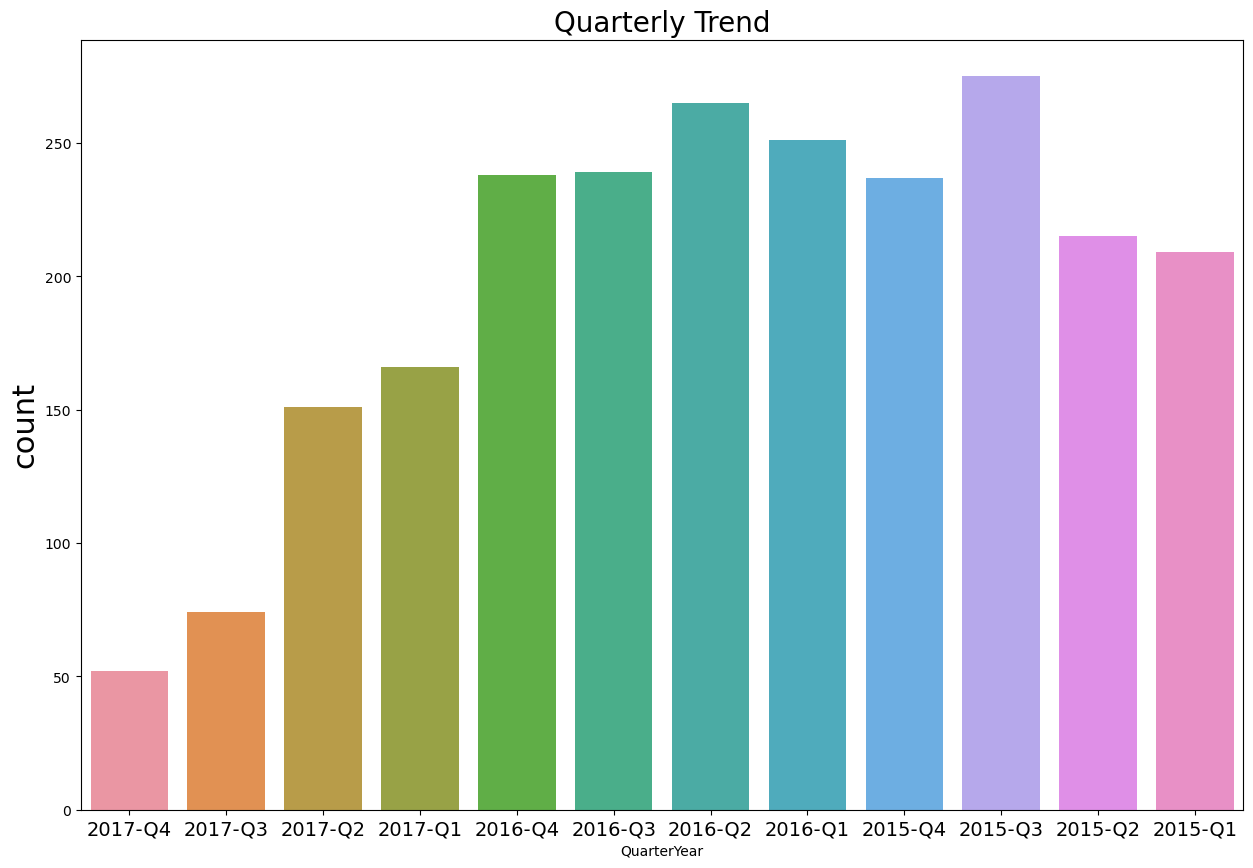

In [76]:
plt.figure(figsize=(15,10))
plt.title('Quarterly Trend',fontsize=20)
plt.ylabel('Count',fontsize=22)
plt.xticks(fontsize=14)
sns.countplot(x='QuarterYear',data=df)

Now, we can see that 2015, and 2016 saw most number of startups being funded. highest being in Quarter 3 of 2015. Then it started declining in 2017 Q1 to 166 startups and 2017 Q4 down to only 52 startups being funded

## Q5. which City has maximum startups?

In [77]:
cities=df[df['CityLocation']!='Not Specified']
cities=cities['CityLocation'].value_counts().sort_values(ascending=False).head(10)
cities

Bangalore    634
Mumbai       449
New Delhi    385
Gurgaon      241
Pune          91
Noida         79
Hyderabad     77
Chennai       67
Ahmedabad     35
Jaipur        25
Name: CityLocation, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Number of Startups in each City'}, xlabel='Count', ylabel='Cities'>

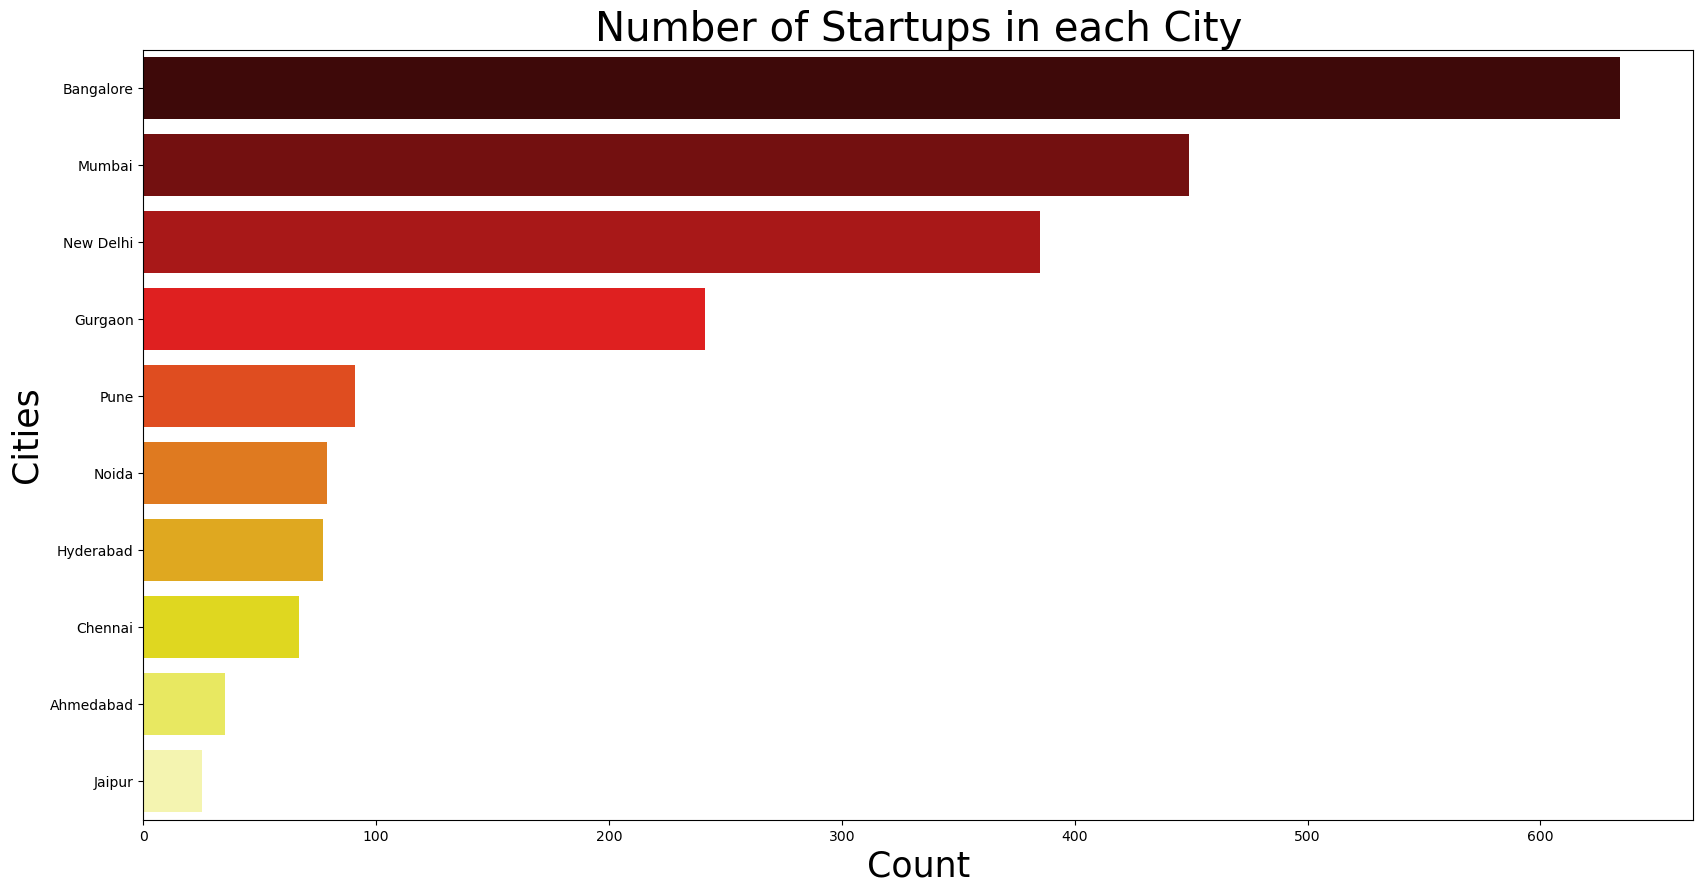

In [78]:
plt.figure(figsize=(20,10))
plt.title('Number of Startups in each City',fontsize=29)
plt.ylabel('Cities',fontsize=25)
plt.xlabel('Count',fontsize=25)
sns.barplot(cities.values,cities.index,palette='hot')

As we see from the graph above, maximum number of startups are based in Banglore (26.72%), followed by Mumbai (18.9%), New Delhi (16.2%), and Gurgaon (10.16%)

72% of the startups funded between January 2015 till December 2017 are based in the above mentioned four cities.

## Q6. Who are the Top Investors by number of startups funded.

In [79]:
df['InvestorsName'].describe()


count                      2372
unique                     1884
top       Undisclosed Investors
freq                         68
Name: InvestorsName, dtype: object

In [80]:
df['InvestorsName'].values[0]


'SBI-FMO Fund, Bessemer Venture Partners, Catamaran Ventures'

'SBI-FMO Fund, Bessemer Venture Partners, Catamaran Ventures'

There are several spelling for undisclosed investors, so let's clean that up.

In [81]:
def investors_cleaner(x):
    b=str(x).lower()
    if 'undisclosed' in b:
        return 'Undisclosed Investor'
    else:
        return x

In [82]:
df['InvestorsName']=df['InvestorsName'].apply(investors_cleaner)


We see that a startup can be funded by multiple investors separated by commas. So let's make a new column 'NumberOfInvestors' which counts the number of investors for a particular startup

In [83]:
def investors_counter(x):
    l=x.split(',')
    return len(l)

In [84]:
df['NumberOfInvestors']=df['InvestorsName'].apply(investors_counter)


To find out the Investor who has funded maximum number of companies, we need to devise a way because some companies have multiple investors and we need to search each row for occurence of each investors name and count it. We will use re.search() method for this task. Below is the devised algorithm to find out actual number of startups funded by each investor by analysing rows with multiple investor names

Note: I do not take into account that startups have got multiple fundings at different point of times, i am just counting number of startups that were funded by each investor once, or more than once.

In [86]:
investors_companies_funded={}
unique_name=df['InvestorsName'].unique()
name=np.array(df['InvestorsName'].values)
for i in range(len(unique_name)):
    for j in range(len(name)):
        if(re.search(unique_name[i],name[j])):
            investors_companies_funded[unique_name[i]]=investors_companies_funded.get(unique_name[i],0)+1


In [87]:
lst_investors = pd.DataFrame({'Name':list(investors_companies_funded.keys()),'Number of Startups Funded':list(investors_companies_funded.values())}).sort_values('Number of Startups Funded',ascending=False)


In [88]:
lst_investors[lst_investors['Name']!='Undisclosed Investor'].head(10)


,Name,Number of Startups Funded
137,Sequoia Capital,74
117,Accel Partners,63
447,Kalaari Capital,51
159,Blume Ventures,47
460,SAIF Partners,45
1,Indian Angel Network,42
898,Tiger Global,41
1372,IDG Ventures,40
563,Ratan Tata,30
1596,Mohandas Pai,29


The below code allows us to find the startups funded by each investor by passing in investor name as parameter. (Note: Some startups have more than one investors)

In [89]:
temp=investors_companies_funded
del temp['Undisclosed Investor']
index=list(temp.keys())
values=list(temp.values())

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Count of number of Startups Funded by Investors'}, xlabel='Investors', ylabel='Count'>

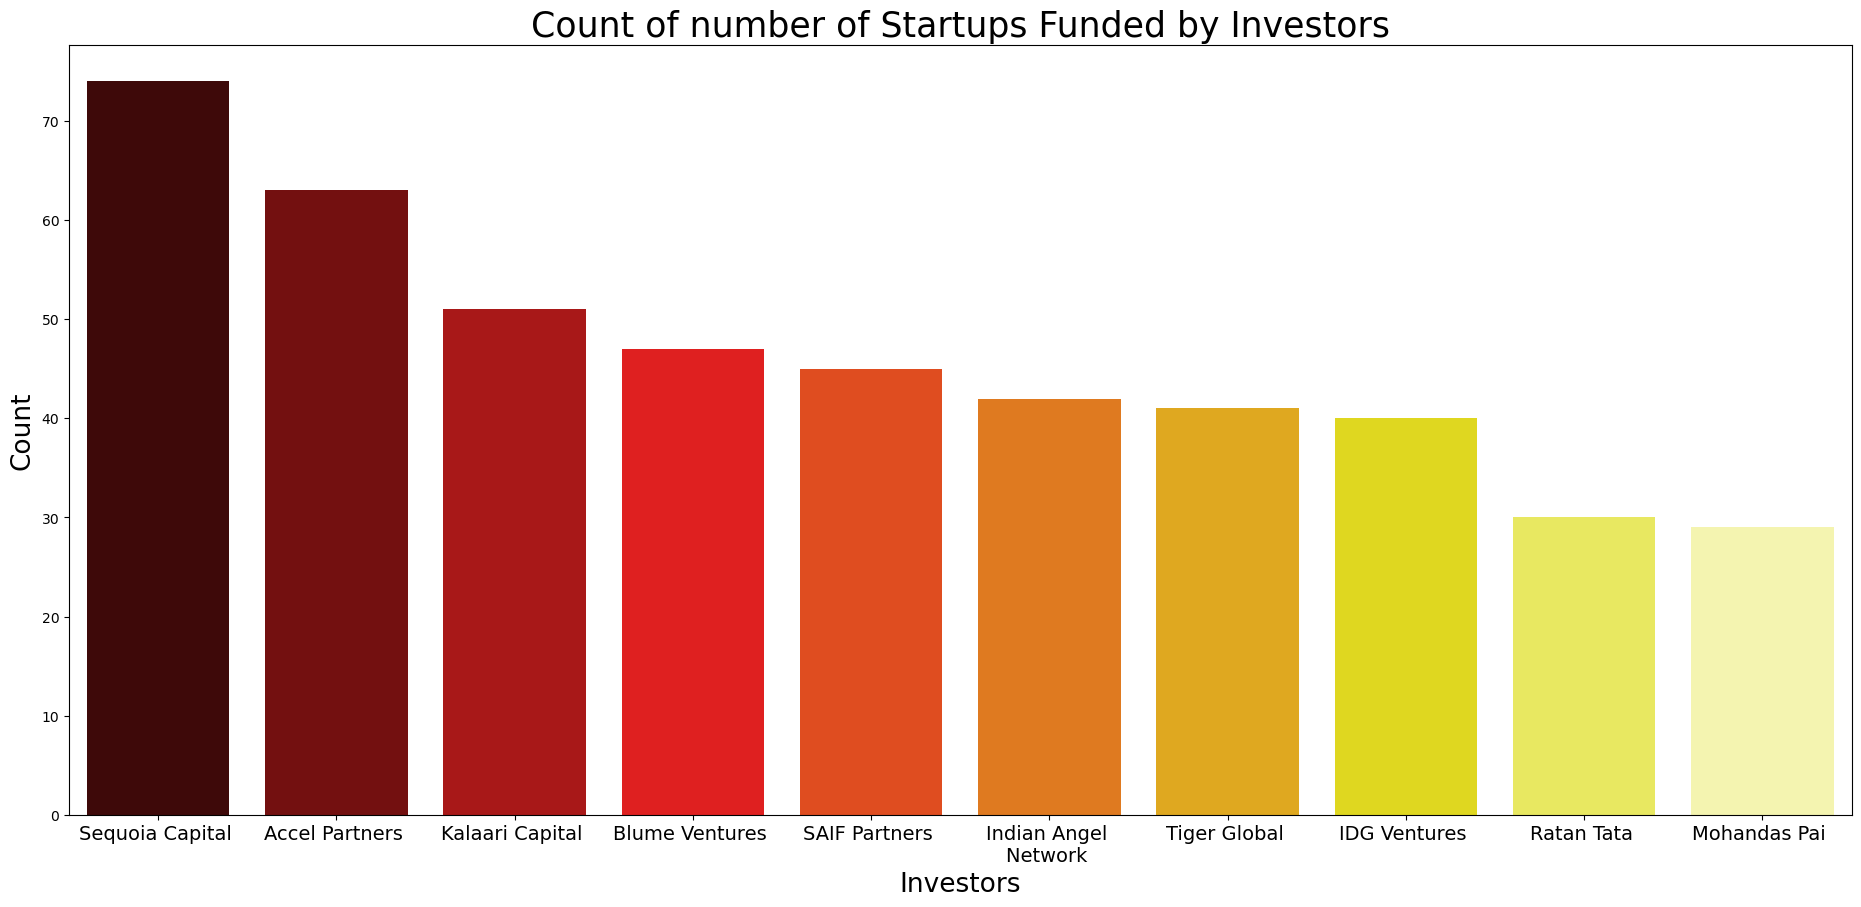

In [90]:
graph_data=pd.Series(values,index=index).sort_values(ascending=False).head(10)
graph_data=ticks_display_cleaner(graph_data)
plt.figure(figsize=(23,10))
plt.xlabel('Investors',fontsize=19)
plt.ylabel('Count',fontsize=19)
plt.title('Count of number of Startups Funded by Investors',fontsize=25)
plt.xticks(fontsize=14)
sns.barplot(graph_data.index,graph_data.values,palette='hot')

In [91]:
def startup_finder(investor):
    rows=[]
    for i,v in zip(df['InvestorsName'].index,df['InvestorsName'].values):
        if re.search(investor,v):
            rows.append(i)
    return df.iloc[rows,:]

## Q7. Which are the most common Investment types

In [92]:
df['InvestmentType'].value_counts()


Seed Funding      1302
Private Equity    1066
Debt Funding         1
Crowd Funding        1
Crowd funding        1
PrivateEquity        1
Name: InvestmentType, dtype: int64

Joining duplicate values with different spellings.



In [93]:
df['InvestmentType'].replace('SeedFunding','Seed Funding',inplace=True)
df['InvestmentType'].replace('PrivateEquity','Private Equity',inplace=True)


In [94]:
df['InvestmentType'].value_counts()


Seed Funding      1302
Private Equity    1067
Debt Funding         1
Crowd Funding        1
Crowd funding        1
Name: InvestmentType, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Common Investment Types'}, ylabel='Count'>

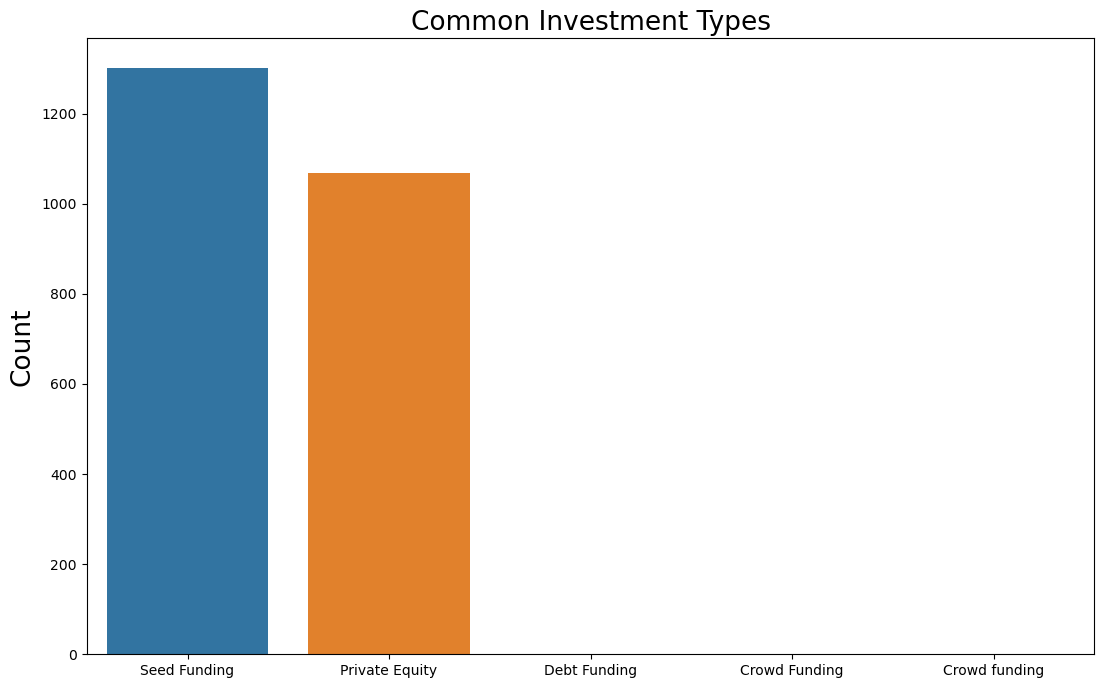

In [95]:
graph_data=df['InvestmentType'].value_counts()
plt.figure(figsize=(13,8))
plt.ylabel('Count',fontsize=19)
plt.title('Common Investment Types',fontsize=19)
sns.barplot(graph_data.index,graph_data.values)


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

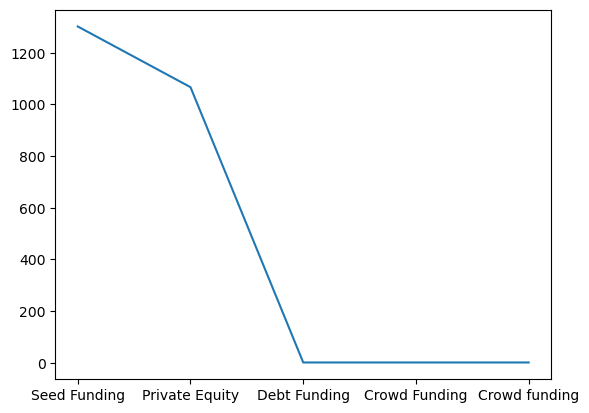

In [97]:
sns.lineplot(graph_data.index,graph_data.values)


# Conclusion


So, this was all my analysis was about, we got to know about the industries favored by investors, common investment types, and many more interesting observations about the Indian Startup Ecosystem. We also got to know that the year 2015 and 2016 were the booming years for Indian startups, with the most number of startups funded, and gradually started declining in 2017. A factor that could contribute to this sharp decline would be the announcement of Demonetization by the Indian Government in November 2016.

# THE END